In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D   
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection


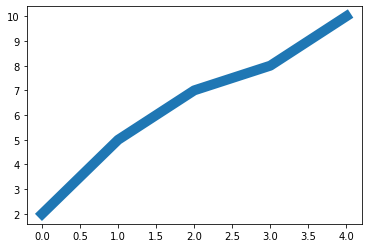

In [2]:
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y, linewidth=10); #plot中改

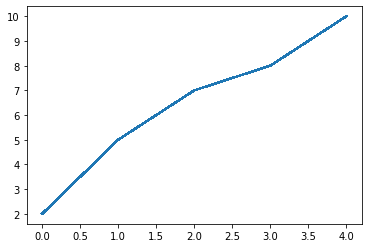

In [3]:
x = range(0,5)
y = [2,5,7,8,10]
line, = plt.plot(x, y, '-') #注意逗号符号，这里等号坐标的line,是一个列表解包的操作，目的是获取plt.plot返回列表中的Line2D对象
line.set_antialiased(False); #改line变量

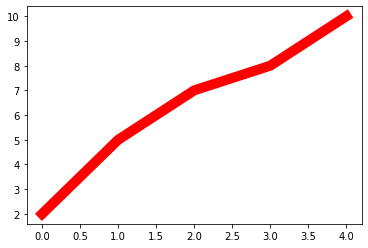

In [4]:
# 3) 获得线属性，使用setp()函数设置
x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x, y)
plt.setp(lines, color='r', linewidth=10);#使用给函数设置变量

<Axes.ArtistList of 2 lines>


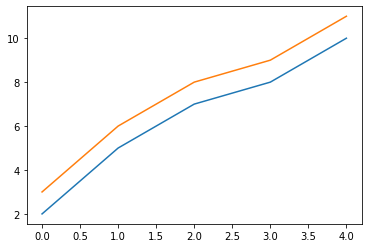

In [5]:
# 1. plot方法绘制
x = range(0,5)
y1 = [2,5,7,8,10]
y2= [3,6,8,9,11]

fig,ax= plt.subplots()
ax.plot(x,y1)
ax.plot(x,y2)
print(ax.lines); # 通过直接使用辅助方法画线，打印ax.lines后可以看到在matplotlib在底层创建了两个Line2D对象

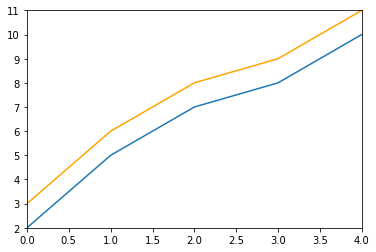

In [6]:
# 2. Line2D对象绘制

x = range(0,5)
y1 = [2,5,7,8,10]
y2= [3,6,8,9,11]
fig,ax= plt.subplots()
lines = [Line2D(x, y1), Line2D(x, y2,color='orange')]  # 显式创建Line2D对象，默认蓝色
for line in lines:
    ax.add_line(line) # 使用add_line方法将创建的Line2D添加到子图中
ax.set_xlim(0,4)
ax.set_ylim(2, 11);


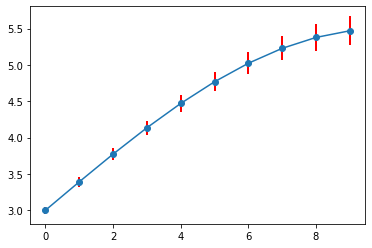

In [7]:
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)
plt.errorbar(x,y+3,yerr=yerr,fmt='o-',ecolor='r',elinewidth=2);

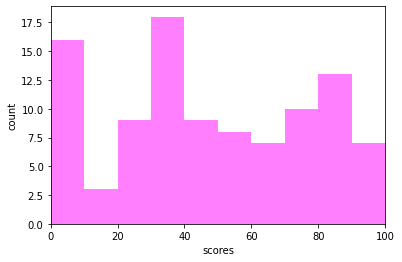

In [8]:
# hist绘制直方图
x=np.random.randint(0,100,100) #生成[0-100)之间的100个数据,即 数据集 
bins=np.arange(0,101,10) #设置连续的边界值，即直方图的分布区间[0,10),[10,20)... 
plt.hist(x,bins,color='fuchsia',alpha=0.5)#alpha设置透明度，0为完全透明 
plt.xlabel('scores') 
plt.ylabel('count') 
plt.xlim(0,100); #设置x轴分布范围 plt.show()

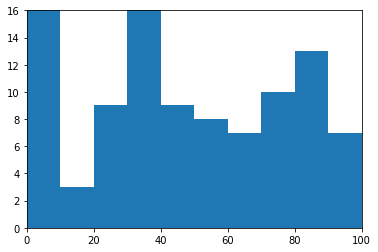

In [9]:
# Rectangle矩形类绘制直方图
df = pd.DataFrame(columns = ['data'])
df.loc[:,'data'] = x
df['fenzu'] = pd.cut(df['data'], bins=bins, right = False, include_lowest=True)

df_cnt = df['fenzu'].value_counts().reset_index()
# astype()转换数据类型，转化为dataframe下的数据类型，map()返回列表形式
df_cnt.loc[:,'mini'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\[(.*)\,',x)[0]).astype(int)
df_cnt.loc[:,'maxi'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\,(.*)\)',x)[0]).astype(int)
df_cnt.loc[:,'width'] = df_cnt['maxi']- df_cnt['mini']
df_cnt.sort_values('mini',ascending = True,inplace = True)
df_cnt.reset_index(inplace = True,drop = True)

#用Rectangle把hist绘制出来

fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in df_cnt.index:
    rect =  plt.Rectangle((df_cnt.loc[i,'mini'],0),df_cnt.loc[i,'width'],df_cnt.loc[i,'fenzu'])
    ax1.add_patch(rect)

ax1.set_xlim(0, 100)
ax1.set_ylim(0, 16);

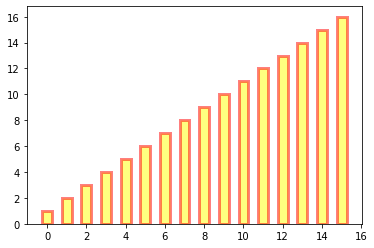

In [10]:
# bar绘制柱状图 lw求模
y = range(1,17)
plt.bar(np.arange(16), y, alpha=0.5, width=0.5, color='yellow', edgecolor='red', label='The First Bar', lw=3);


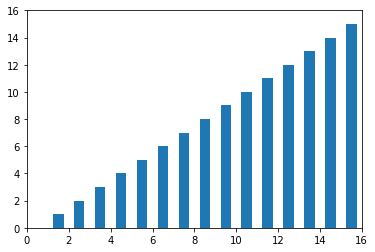

In [11]:
# Rectangle矩形类绘制柱状图
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(1,17):
    rect =  plt.Rectangle((i+0.25,0),0.5,i)
    ax1.add_patch(rect)
ax1.set_xlim(0, 16)
ax1.set_ylim(0, 16);

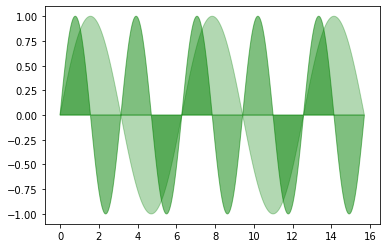

In [12]:
# 用fill来绘制图形 创建数组， 在0-5pi等间隔切割，生成数组长度为1000
x = np.linspace(0, 5 * np.pi, 1000) 
y1 = np.sin(x)
y2 = np.sin(2 * x) 
plt.fill(x, y1, color = "g", alpha = 0.3);
plt.fill(x, y2, color = "g", alpha = 0.5);

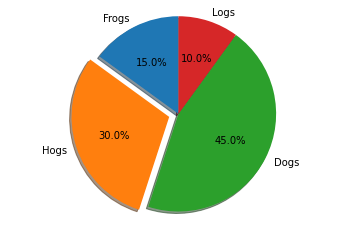

In [13]:
# pie绘制饼状图
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10] 
explode = (0, 0.1, 0, 0) #突出0.1
fig1, ax1 = plt.subplots() 
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90) 
ax1.axis('equal'); # Equal aspect ratio ensures that pie is drawn as a circle. 


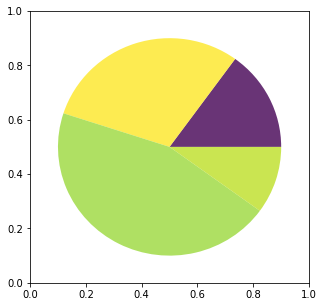

In [14]:
# wedge绘制饼图
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
theta1 = 0
sizes = [15, 30, 45, 10] 
patches = []
patches += [
    Wedge((0.5, 0.5), .4, 0, 54),           
    Wedge((0.5, 0.5), .4, 54, 162),  
    Wedge((0.5, 0.5), .4, 162, 324),           
    Wedge((0.5, 0.5), .4, 324, 360),  
]
colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.8)
p.set_array(colors)
ax1.add_collection(p);

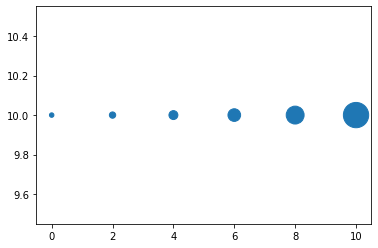

In [15]:
# 用scatter绘制散点图
x = [0,2,4,6,8,10] 
y = [10]*len(x) 
s = [20*2**n for n in range(len(x))] #s设置半径
plt.scatter(x,y,s=s) ;


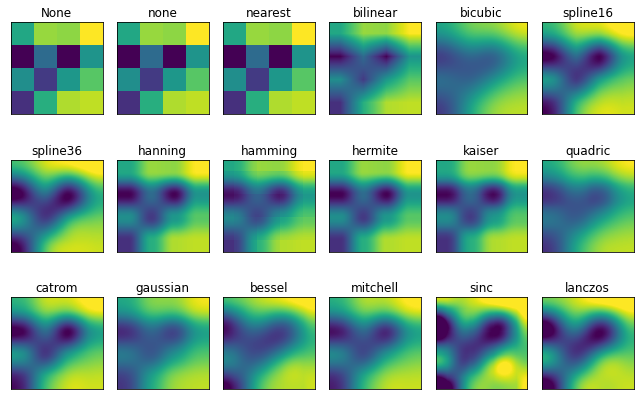

In [16]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']


grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout();

In [17]:
path = '/Users/zhanghaozeng/Desktop/Drugs.csv'
data = pd.read_csv(path)


AxesSubplot(0.125,0.536818;0.775x0.343182)
[<AxesSubplot:>, <Axes:>]


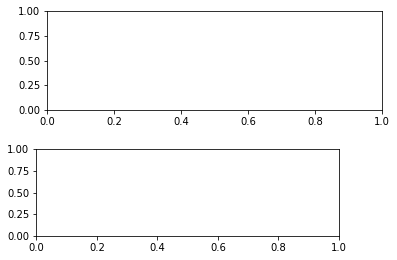

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(211) # 作一幅2*1的图，选择第1个子图
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3]) # 位置参数，四个数分别代表了(left,bottom,width,height)
print(ax1) 
print(fig.axes) # fig.axes 中包含了subplot和axes两个实例, 刚刚添加的


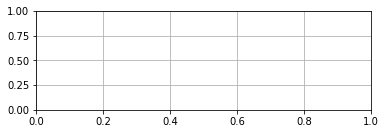

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(211)

for ax in fig.axes:
    ax.grid(True)

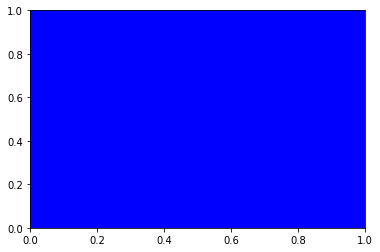

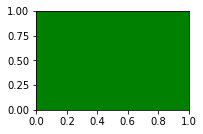

In [20]:
fig = plt.figure()
fig1 = plt.figure()
ax = fig.add_subplot(111)
ax1 = fig1.add_subplot(222)
rect = ax.patch  # axes的patch是一个Rectangle实例
rect1 = ax1.patch
rect.set_facecolor('blue')
rect1.set_facecolor('green')

array([-0.2,  4.2])

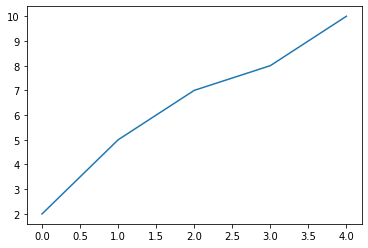

In [21]:
# 不用print，直接显示结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

fig, ax = plt.subplots()
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x, y, '-')

axis = ax.xaxis # axis为X轴对象
axis.get_ticklocs()     # 获取刻度线位置
axis.get_ticklabels()   # 获取刻度label列表(一个Text实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick label。
axis.get_ticklines()    # 获取刻度线列表(一个Line2D实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick line。
axis.get_data_interval()# 获取轴刻度间隔
axis.get_view_interval()# 获取轴视角（位置）的间隔


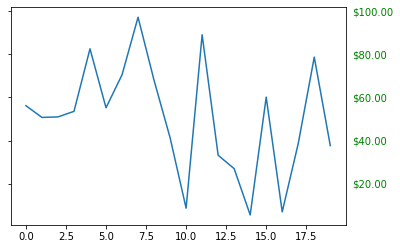

In [22]:
fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# 设置ticker的显示格式
formatter = matplotlib.ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

# 设置ticker的参数，右侧为主轴，颜色为绿色
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=False, labelright=True);